# Single-cell RNA-seq with `scanpy`. Part 2

Search for marker genes in cell clusters

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt

## Finding the top 20 genes for each cluster

Let’s calculate the differentially expressed genes for every cluster, compared to the rest of the cells in our adata.

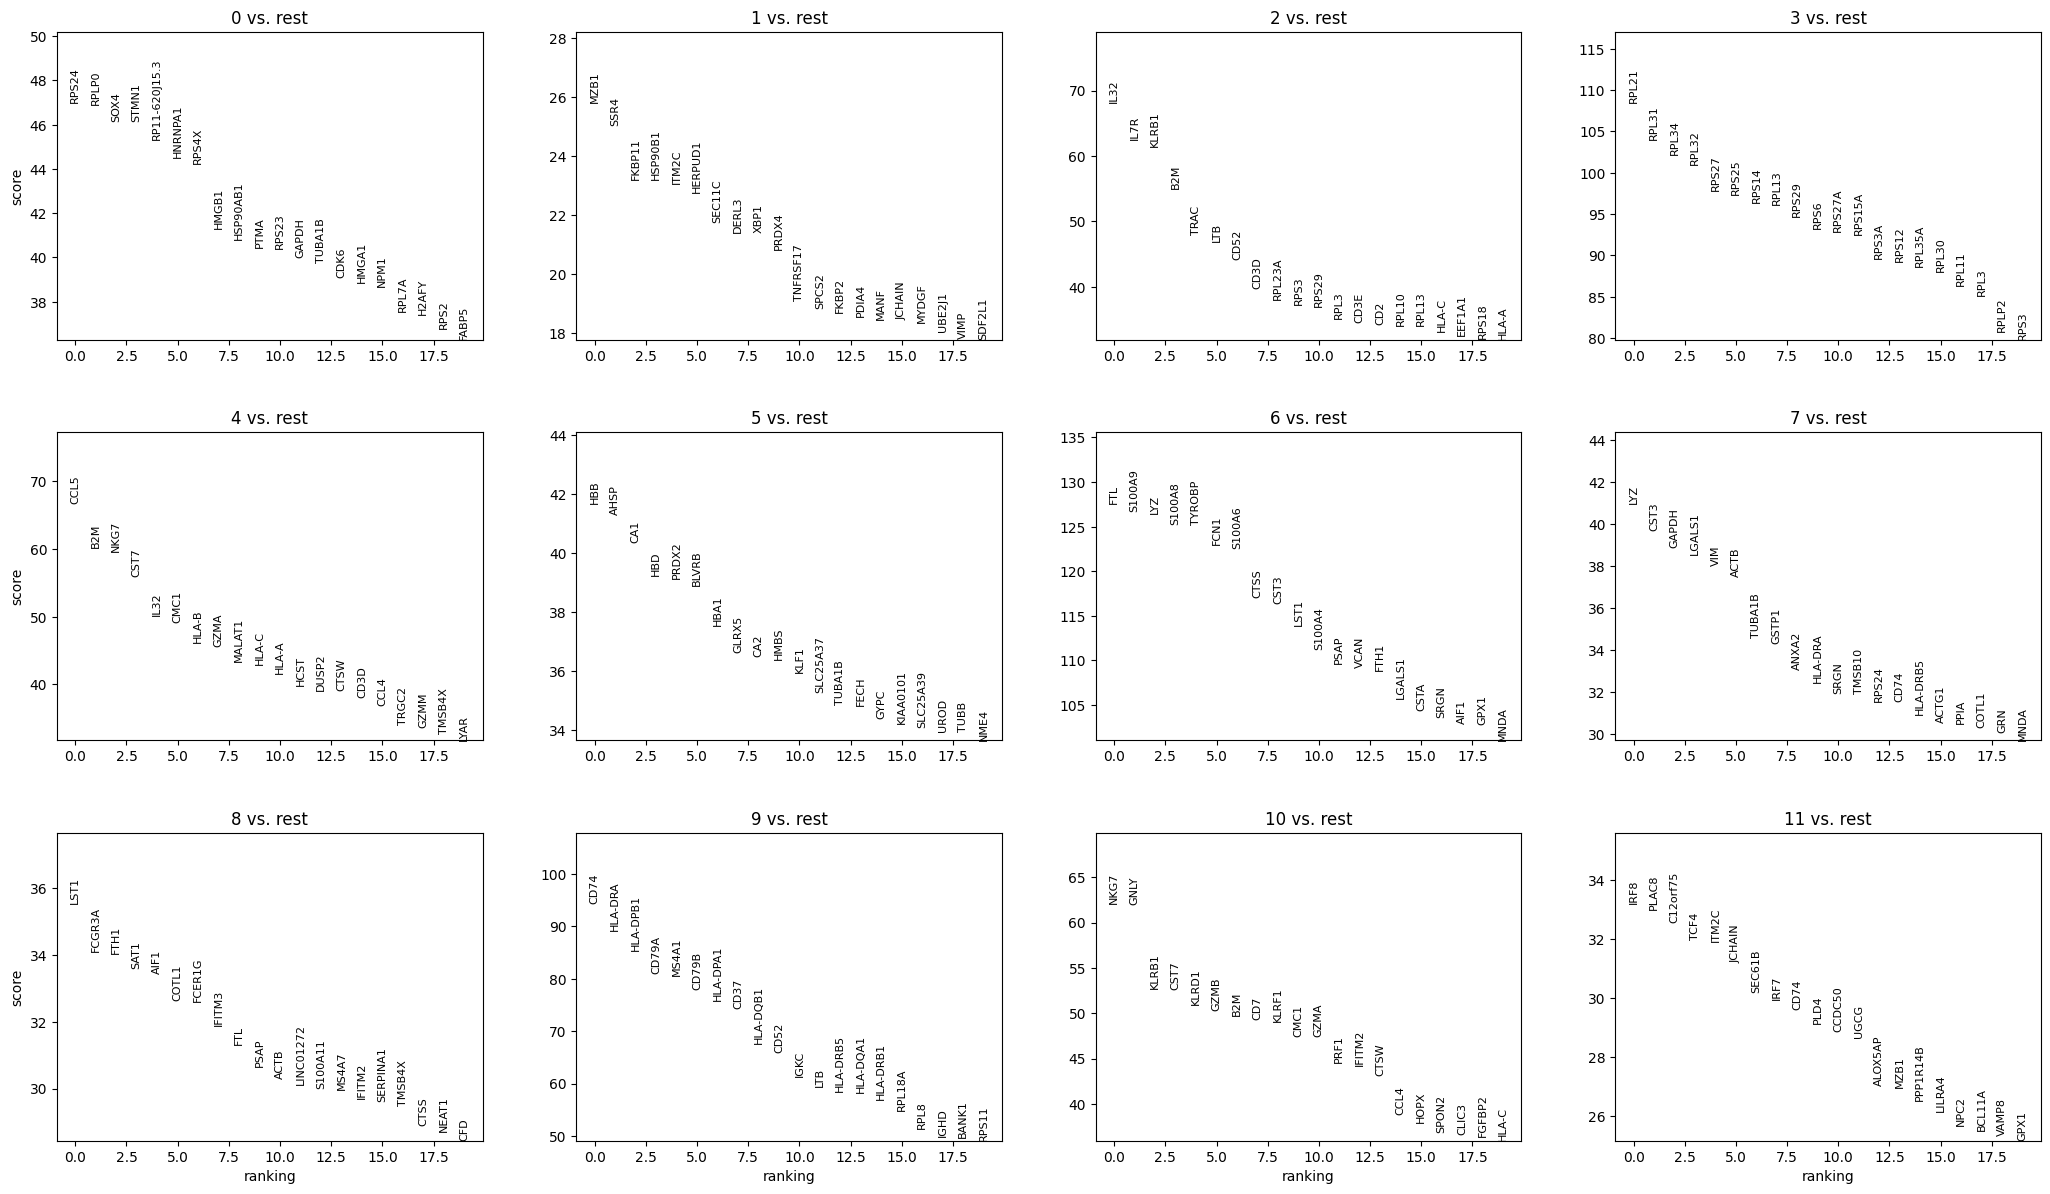

In [31]:
sc.tl.rank_genes_groups(adata, groupby='leiden_0_5', method='wilcoxon', use_raw=False,  figsize=(10, 6))
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

/home/vbasova/.conda/envs/sci_env/lib/python3.9/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


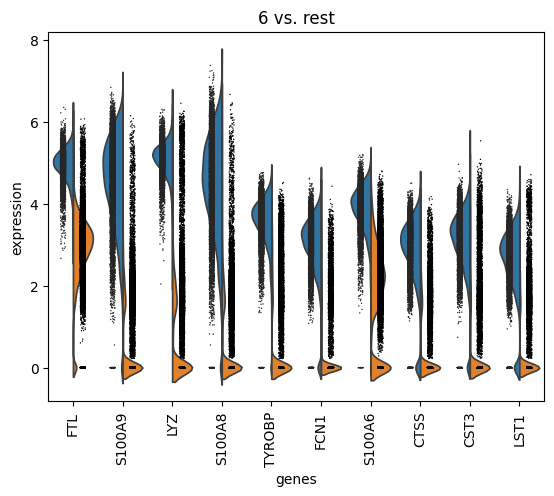

In [35]:
sc.pl.rank_genes_groups_violin(adata, groups='6', n_genes=10)

## Annotation of cell types

##### Group 0: **early B-cell progenitors**
    
RPS, RPL, RPLP and all sorts of ribosomal proteins signaling active division

STMN1, TUBA1B, CDK6, MKI67, HMGA1 proteins for proliferation

SOX4, MYB, IGLL1 transcription factors

IGLL1 is a marker of pre-B cells

In [39]:
sc.get.rank_genes_groups_df(adata, group='0').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,RPS24,46.975681,1.086099,0.000000e+00,0.000000e+00
1,RPLP0,46.923672,1.437716,0.000000e+00,0.000000e+00
2,SOX4,46.148438,4.330789,0.000000e+00,0.000000e+00
3,STMN1,46.127064,4.212089,0.000000e+00,0.000000e+00
4,RP11-620J15.3,45.314995,5.005981,0.000000e+00,0.000000e+00
5,HNRNPA1,44.506821,1.711850,0.000000e+00,0.000000e+00
6,RPS4X,44.259327,0.899780,0.000000e+00,0.000000e+00
7,HMGB1,41.306671,2.081686,0.000000e+00,0.000000e+00
8,HSP90AB1,40.800766,2.465514,0.000000e+00,0.000000e+00
9,PTMA,40.440666,0.951745,0.000000e+00,0.000000e+00


##### Group 1: **Plasma cells**

MZB1, XBP1, FKBP11, JCHAIN, TNFRSF17 plasma cell markers

XBP1 differentiation regulator

TNFRSF17 (BCMA) plasma cell receptor

In [41]:
sc.get.rank_genes_groups_df(adata, group='1').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,MZB1,25.789698,7.850559,1.157062e-146,1.967932e-142
1,SSR4,25.024406,4.197666,3.317022e-138,2.300563e-134
2,FKBP11,23.208065,5.202757,3.774874e-119,2.377891e-116
3,HSP90B1,23.200647,3.976337,4.485116e-119,2.724388e-116
4,ITM2C,23.044666,5.336274,1.663656e-117,9.431820e-115
5,HERPUD1,22.753416,4.543488,1.327487e-114,5.941552e-112
6,SEC11C,21.744963,4.800706,7.709629e-105,2.521642e-102
7,DERL3,21.404169,6.633669,1.221801e-101,3.522099e-99
8,XBP1,21.396135,4.016870,1.451547e-101,4.114653e-99
9,PRDX4,20.828863,4.836739,2.370234e-96,6.298897e-94


##### Group 2: **Naive/CM/MAIT T-cells**

CD3D, CD3E, CD2, TRAC t-cell markers

KLRB1 cd8+ and maite

no cytotoxicity markers 

In [43]:
sc.get.rank_genes_groups_df(adata, group='2').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,IL32,68.101631,3.184796,0.000000e+00,0.000000e+00
1,IL7R,62.524876,3.148012,0.000000e+00,0.000000e+00
2,KLRB1,61.471359,4.632613,0.000000e+00,0.000000e+00
3,B2M,54.976460,0.729272,0.000000e+00,0.000000e+00
4,TRAC,48.046783,2.227125,0.000000e+00,0.000000e+00
5,LTB,46.901215,2.031268,0.000000e+00,0.000000e+00
6,CD52,44.133472,1.498384,0.000000e+00,0.000000e+00
7,CD3D,39.792473,1.852720,0.000000e+00,0.000000e+00
8,RPL23A,37.988930,0.547484,0.000000e+00,0.000000e+00
9,RPS3,37.292324,0.529103,2.185419e-304,3.097467e-301


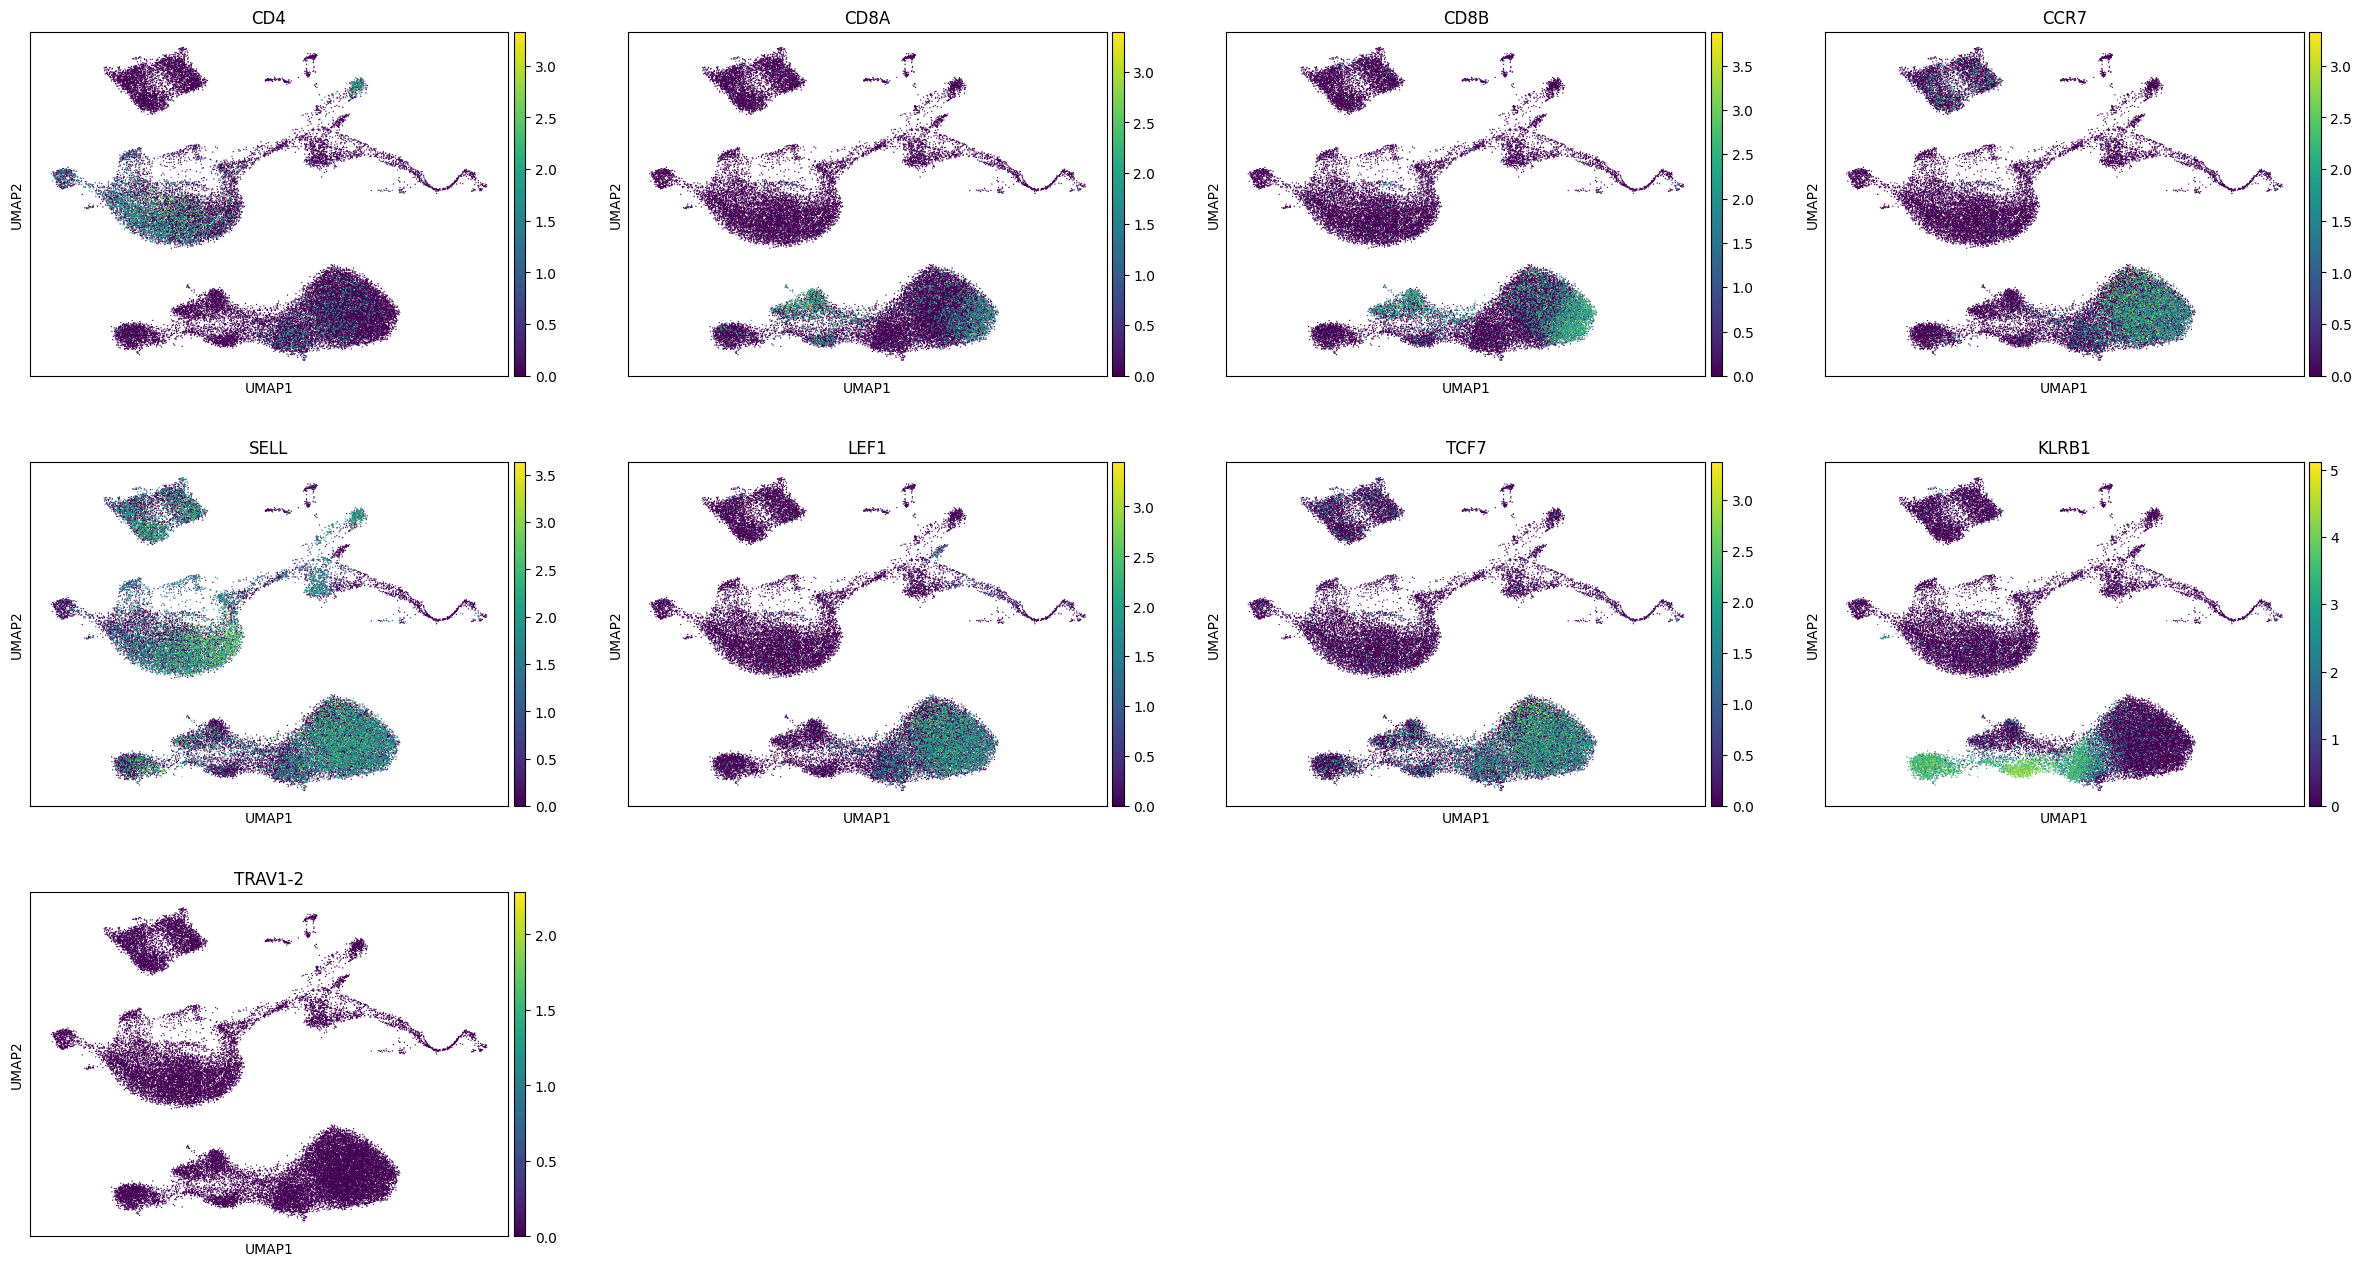

In [44]:
sc.pl.umap(adata, color=["CD4", "CD8A", "CD8B", "CCR7", "SELL", "LEF1", "TCF7", "KLRB1", "TRAV1-2"], use_raw=False)


##### Group 3: **CD8+ Naive T cells**

lots of ribosomal proteins on R

CD3D and TRAC (somewhere around the 40th positions)

looking at the umap from above you can see that there are a lot of cd8b, "SELL", "LEF1", "TCF7", ccr7

In [48]:
sc.get.rank_genes_groups_df(adata, group='3').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,RPL21,108.442116,0.807126,0.0,0.0
1,RPL31,103.962189,1.013406,0.0,0.0
2,RPL34,102.232079,0.742667,0.0,0.0
3,RPL32,100.937218,0.687519,0.0,0.0
4,RPS27,97.884735,0.851976,0.0,0.0
5,RPS25,97.328194,0.899880,0.0,0.0
6,RPS14,96.424423,0.635412,0.0,0.0
7,RPL13,96.127411,0.668731,0.0,0.0
8,RPS29,94.725311,0.781464,0.0,0.0
9,RPS6,93.306480,0.848421,0.0,0.0


##### Group 4: **Cytotoxic CD8+ T cells**

CCL5, CCL4, GZMA, GZMH, GZMK, GZMM, GNLY, NKG7, CST7 markers of cytotoxicity in NK and CD8+ t-c

CD8A, CD8B - well here it is clear

CD3D, CD3E, TRAC, TRBC2 - well here it is also clear

KLRD1, KLRG1 - markers of NK cells mixed in a little

In [51]:
sc.get.rank_genes_groups_df(adata, group='4').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,CCL5,66.737503,6.488536,0.000000e+00,0.000000e+00
1,B2M,60.195976,1.206911,0.000000e+00,0.000000e+00
2,NKG7,59.549980,5.418873,0.000000e+00,0.000000e+00
3,CST7,55.887684,5.109985,0.000000e+00,0.000000e+00
4,IL32,50.197853,3.182425,0.000000e+00,0.000000e+00
5,CMC1,49.202023,5.010941,0.000000e+00,0.000000e+00
6,HLA-B,46.240894,1.174953,0.000000e+00,0.000000e+00
7,GZMA,45.565903,4.504622,0.000000e+00,0.000000e+00
8,MALAT1,43.402611,1.003700,0.000000e+00,0.000000e+00
9,HLA-C,43.001839,1.407171,0.000000e+00,0.000000e+00


##### Group 10: **Cytotoxic NK cells**

NKG7, GNLY, GZMB, GZMA, PRF1, CTSW, CCL4 cytotoxic markers

KLRD1, KLRF1, KLRB1 natural killer cells

FGFBP2 special NK marker.

In [52]:
sc.get.rank_genes_groups_df(adata, group='10').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,NKG7,62.063400,6.917011,0.000000e+00,0.000000e+00
1,GNLY,61.964565,8.048923,0.000000e+00,0.000000e+00
2,KLRB1,52.707352,5.293508,0.000000e+00,0.000000e+00
3,CST7,52.597862,5.453368,0.000000e+00,0.000000e+00
4,KLRD1,50.920788,6.243850,0.000000e+00,0.000000e+00
5,GZMB,50.264202,6.679493,0.000000e+00,0.000000e+00
6,B2M,49.732254,1.103280,0.000000e+00,0.000000e+00
7,CD7,49.317688,3.815929,0.000000e+00,0.000000e+00
8,KLRF1,49.080269,7.055472,0.000000e+00,0.000000e+00
9,CMC1,47.409046,5.158485,0.000000e+00,0.000000e+00


##### Group 5: **Erythroid cells**

HBB (β-hemoglobin), HBA1 (α-hemoglobin), HBD, AHSP obviously red blood cells

CA1, CA2 carboanhydrase 

FECH, HMBS, UROD hem synthesis

In [53]:
sc.get.rank_genes_groups_df(adata, group='5').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,HBB,41.684929,7.268107,0.000000e+00,0.000000e+00
1,AHSP,41.301277,8.131214,0.000000e+00,0.000000e+00
2,CA1,40.360493,7.692414,0.000000e+00,0.000000e+00
3,HBD,39.235229,7.135961,0.000000e+00,0.000000e+00
4,PRDX2,39.122295,5.232626,0.000000e+00,0.000000e+00
5,BLVRB,38.906071,4.951041,0.000000e+00,0.000000e+00
6,HBA1,37.548916,6.675388,1.467370e-308,2.268821e-305
7,GLRX5,36.625526,4.599571,1.122435e-293,1.590865e-290
8,CA2,36.498585,7.136194,1.167797e-291,1.527838e-288
9,HMBS,36.400581,6.008600,4.167826e-290,5.063314e-287


##### Group 6: **Classical monocytes (CD14+)**

S100A8, S100A9, S100A6, S100A4, S100A11 monocyte markers

LYZ lysozyme

VCAN characteristic of 14+ monocytes

In [54]:
sc.get.rank_genes_groups_df(adata, group='6').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,FTL,127.602554,2.974732,0.0,0.0
1,S100A9,126.695999,6.604299,0.0,0.0
2,LYZ,126.420273,6.774192,0.0,0.0
3,S100A8,125.258781,6.484143,0.0,0.0
4,TYROBP,125.228737,5.576897,0.0,0.0
5,FCN1,122.976318,6.265347,0.0,0.0
6,S100A6,122.545624,3.259505,0.0,0.0
7,CTSS,116.980850,4.679952,0.0,0.0
8,CST3,116.357384,5.234200,0.0,0.0
9,LST1,113.861275,4.858260,0.0,0.0


##### Cluster 7: **cDC**

HLA-DRA, HLA-DRB5, CD74 mns second class

CST3, SRGN, GRN, MNDA markers apc 

visible "CLEC10A", "CD1C" on yumap on part of the cluster (this is DC2)

In [55]:
sc.get.rank_genes_groups_df(adata, group='7').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,LYZ,40.973389,4.955827,0.000000e+00,0.000000e+00
1,CST3,39.671288,3.870031,0.000000e+00,0.000000e+00
2,GAPDH,38.892860,2.267930,0.000000e+00,0.000000e+00
3,LGALS1,38.548016,3.456646,0.000000e+00,0.000000e+00
4,VIM,37.993271,2.415454,0.000000e+00,0.000000e+00
5,ACTB,37.477402,1.313572,2.150247e-307,5.224486e-304
6,TUBA1B,34.601845,3.078508,2.370251e-262,4.479248e-259
7,GSTP1,34.300301,2.465136,7.766443e-258,1.320917e-254
8,ANXA2,33.078766,2.904867,6.003914e-240,9.283143e-237
9,HLA-DRA,32.471985,3.041267,2.651628e-231,3.758241e-228


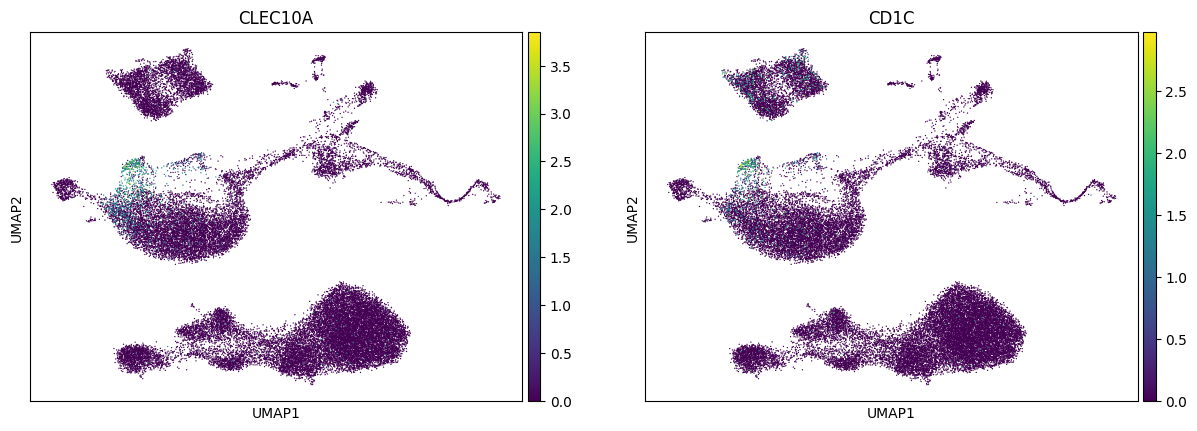

In [56]:
sc.pl.umap(adata, color=["CLEC10A", "CD1C"], use_raw=False)

##### Group 8: **Non-classical monocytes (CD16+)**

FCGR3A cd16+ non-classical monocytes

MS4A7 also

In [57]:
sc.get.rank_genes_groups_df(adata, group='8').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,LST1,35.525585,5.171762,1.979869e-276,3.367361e-272
1,FCGR3A,34.109341,7.054193,5.362356e-255,4.560147e-251
2,FTH1,34.048038,3.040388,4.339485e-254,2.460198e-250
3,SAT1,33.578285,4.211734,3.480872e-247,1.480067e-243
4,AIF1,33.447838,4.487317,2.767055e-245,9.412413e-242
5,COTL1,32.645760,3.667914,9.203810e-234,2.608973e-230
6,FCER1G,32.597626,4.426075,4.431336e-233,1.076688e-229
7,IFITM3,31.871283,5.331659,6.677154e-223,1.419563e-219
8,FTL,31.324987,2.665080,2.132165e-215,4.029318e-212
9,PSAP,30.656330,3.698606,2.176119e-206,3.701142e-203


##### Group 9: **B-cells**

CD79A, CD79B, MS4A1 mature b-cells

CD74, HLA-DRA, HLA-DPB1, HLA-DRB1/5, HLA-DQA1/DPA1/DQB1 MHC II

In [58]:
sc.get.rank_genes_groups_df(adata, group='9').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,CD74,94.251152,4.559545,0.0,0.0
1,HLA-DRA,89.095345,4.418119,0.0,0.0
2,HLA-DPB1,85.423279,4.180808,0.0,0.0
3,CD79A,80.986916,6.526331,0.0,0.0
4,MS4A1,80.484505,7.135216,0.0,0.0
5,CD79B,77.946571,5.761701,0.0,0.0
6,HLA-DPA1,75.859833,3.812116,0.0,0.0
7,CD37,74.289406,2.589627,0.0,0.0
8,HLA-DQB1,67.570534,3.656918,0.0,0.0
9,CD52,65.960808,2.016537,0.0,0.0


##### Group 11: **Plasmacytoid Dendritic Cells (pDCs)**

IRF8, IRF7, TCF4, LILRA4 (ILT7) are pDC markers

In [59]:
sc.get.rank_genes_groups_df(adata, group='11').head(21)

,names,scores,logfoldchanges,pvals,pvals_adj
0,IRF8,33.195957,6.269158,1.231384e-241,2.094338e-237
1,PLAC8,33.005032,4.286375,6.878781e-239,5.849715e-235
2,C12orf75,32.563026,5.521135,1.369635e-232,7.764915e-229
3,TCF4,31.981705,6.062732,1.958992e-224,8.329633e-221
4,ITM2C,31.923546,6.080337,1.258528e-223,4.281009e-220
5,JCHAIN,31.194916,5.908330,1.248802e-213,3.539937e-210
6,SEC61B,30.187752,3.503205,3.429875e-200,8.333617e-197
7,IRF7,29.930515,6.121455,7.889980e-197,1.677410e-193
8,CD74,29.599092,3.965350,1.534979e-192,2.900770e-189
9,PLD4,29.115265,6.827130,2.300849e-186,3.913284e-183


## UMAP for manually annotated cell types

We can see a small green dot on a cluster of platelets. Let's make a UMAP for manually annotated cell types

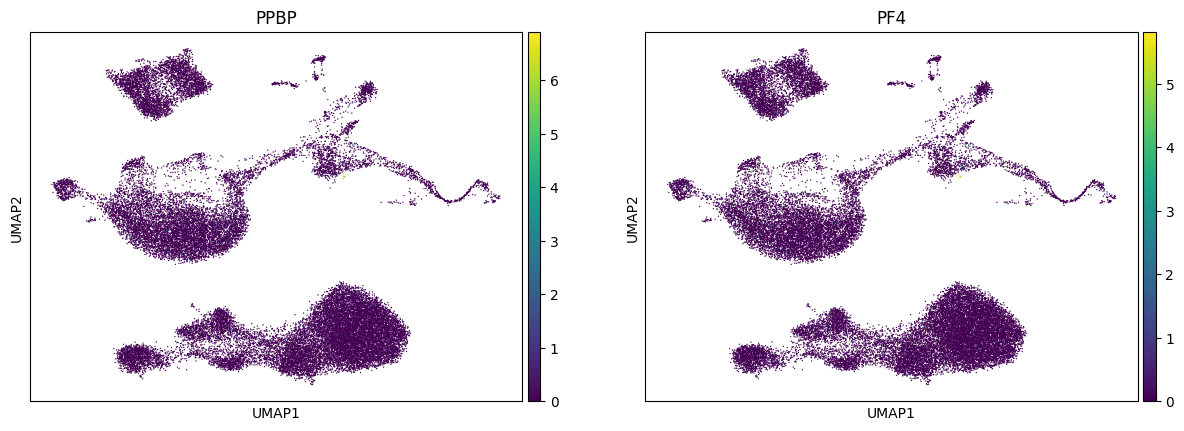

In [74]:
sc.pl.umap(adata, color=["PPBP", "PF4"], use_raw=False)

In [60]:
manual_annotations = {
    '0': 'early B-cell progenitors',
    '1': 'Plasma cells',
    '2': 'Naive CD4+ T cells',
    '3': 'Naive CD8+ T cells',
    '4': 'CD8+ effector T cells',
    '5': 'Erythroid lineage',
    '6': 'Classical Monocytes',
    '7': 'Non-classical Monocytes',
    '8': 'Dendritic cells (DC)',
    '9': 'B cells',
    '10': 'NK cells',
    '11': 'pDCs'
}

In [63]:
adata.obs['leiden_0_5'] = adata.obs['leiden_0_5'].astype(str)
adata.obs['cell_type_manual'] = adata.obs['leiden_0_5'].map(manual_annotations)

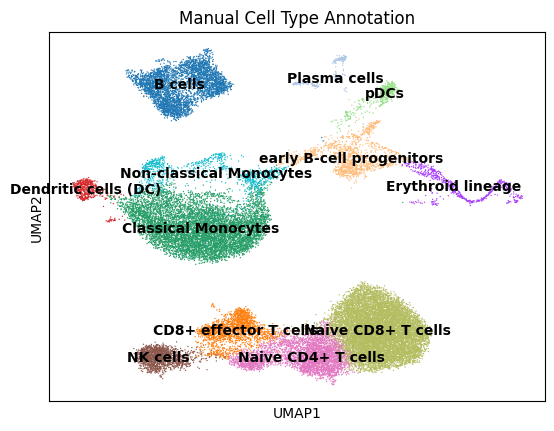

In [64]:
sc.pl.umap(adata, color='cell_type_manual', legend_loc='on data', title='Manual Cell Type Annotation')

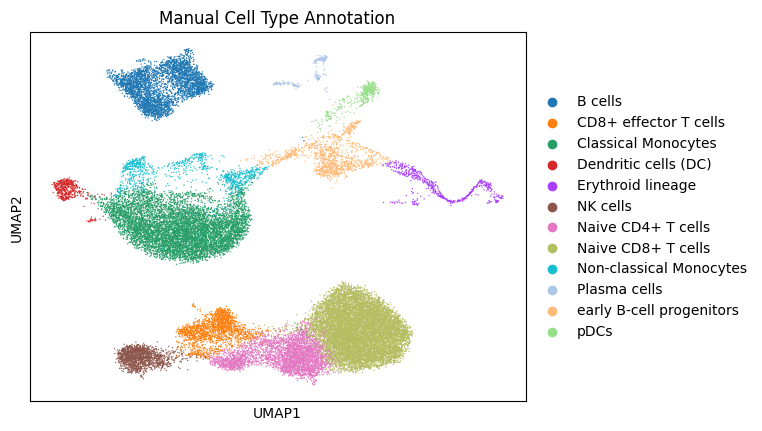

In [65]:
sc.pl.umap(adata, color='cell_type_manual', title='Manual Cell Type Annotation')

Let's count number of cells per type

In [66]:
adata.obs["cell_type_manual"].value_counts()

cell_type_manual
Naive CD8+ T cells          10202
Classical Monocytes          7626
B cells                      3765
Naive CD4+ T cells           3621
CD8+ effector T cells        1811
NK cells                     1427
early B-cell progenitors     1318
Non-classical Monocytes      1001
Erythroid lineage             603
Dendritic cells (DC)          458
pDCs                          422
Plasma cells                  232
Name: count, dtype: int64

## Automated annotation using CellTypist

In [67]:
import celltypist

adata_celltypist = adata.raw.to_adata().copy()
adata_celltypist.var_names_make_unique()

sc.pp.normalize_total(adata_celltypist, target_sum=1e4)
sc.pp.log1p(adata_celltypist)

In [69]:
from celltypist import models, annotate

Do an annotation:

In [70]:
models.download_models(force_update=True, model=["Healthy_COVID19_PBMC.pkl"])
results_cells = annotate(
    adata_celltypist,
    model="Healthy_COVID19_PBMC.pkl",
    majority_voting=True
)

adata_celltypist.obs["celltype"] = results_cells.predicted_labels["majority_voting"]

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54
📂 Storing models in /home/vbasova/.celltypist/data/models
💾 Total models to download: 1
💾 Downloading model [1/1]: Healthy_COVID19_PBMC.pkl
🔬 Input data has 32486 cells and 17008 genes
🔗 Matching reference genes in the model
🧬 3174 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


Make an UMAP:

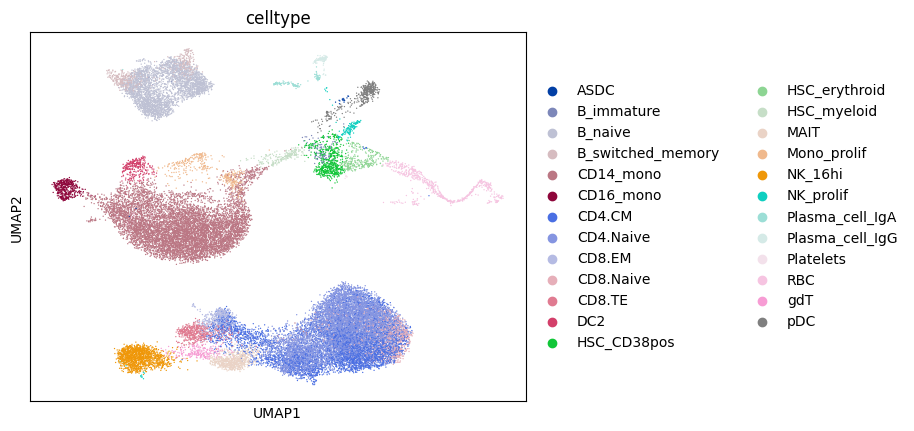

In [71]:
sc.pl.umap(adata_celltypist, color="celltype")

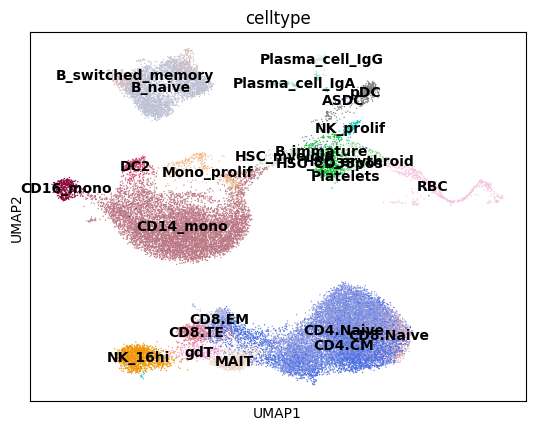

In [75]:
sc.pl.umap(adata_celltypist,legend_loc='on data', color="celltype")

Count the number of cells of each type:

In [73]:
adata_celltypist.obs["celltype"].value_counts()

celltype
CD14_mono            7977
CD4.Naive            7804
CD4.CM               4881
B_naive              3230
NK_16hi              1366
CD8.Naive            1070
MAIT                  694
RBC                   632
HSC_CD38pos           595
CD8.TE                558
B_switched_memory     527
CD8.EM                437
CD16_mono             419
pDC                   405
Mono_prolif           388
HSC_erythroid         281
DC2                   274
gdT                   247
HSC_myeloid           202
NK_prolif             140
Plasma_cell_IgA       137
B_immature            109
Plasma_cell_IgG        90
ASDC                   17
Platelets               6
Name: count, dtype: int64

Let's get the markers from the Healthy_COVID19_PBMC model for all cell types:

In [78]:
unique_types_in_data = adata_celltypist.obs['celltype'].unique()
cell_types_model = list(model.cell_types)

for celltype in unique_types_in_data:
    if celltype not in cell_types_model:
        print(f"\n⚠️ Cell type '{celltype}' not found in model. Skipping.\n")
        continue

    idx = cell_types_model.index(celltype)
    top_idx = np.argsort(coefs[idx])[::-1][:20]
    top_genes = genes[top_idx]
    top_scores = coefs[idx][top_idx]

    markers_df = pd.DataFrame({
        "gene": top_genes,
        "score": top_scores
    })

    print(f"\n🔬 Top markers for {celltype}:\n")
    print(markers_df.to_string(index=False))


🔬 Top markers for HSC_erythroid:

      gene    score
      DUBR 0.233367
    RASAL1 0.187933
AC104590.1 0.184132
     EFNB2 0.180706
     HOXA1 0.175543
   RAPGEF3 0.175260
AL109914.1 0.172953
     GFPT2 0.172692
    LRRC36 0.170801
   GALNTL6 0.170077
 LINC01727 0.168177
   CSNK2A3 0.167518
     RGPD5 0.167414
      PRG2 0.160801
    HIGD2B 0.160634
    FAM81A 0.158787
     GATA1 0.155498
       MME 0.155367
     KCNE5 0.154433
   FAM201A 0.153640

🔬 Top markers for CD4.Naive:

      gene    score
    MT-CYB 0.437526
    MT-CO3 0.348410
 MTRNR2L12 0.300335
     MKI67 0.261292
       LTB 0.243761
     RPL21 0.218862
    MALAT1 0.213890
       B2M 0.206491
      RRM2 0.204969
      TYMS 0.202479
    S100A8 0.194898
    S100A9 0.169048
     UBE2C 0.155758
     CALN1 0.151990
   TACSTD2 0.151805
AC020636.1 0.150764
     TIMP3 0.145181
 LINC01374 0.144031
       SDS 0.142053
     KCNE5 0.138334

🔬 Top markers for CD4.CM:

     gene    score
     HBA1 0.671032
   CLEC4C 0.609088
     HBA2

- 0	Cycling T cells	Высокая экспрессия рибосомных белков, SOX4, CDK6
- 1	Plasma cells	MZB1, XBP1, FKBP11, TNFRSF17
- 2	CD4+ T cells	IL7R, IL32, CD3D, TRAC, KLRB1
- 3	CD3+ activated T cells	Рибосомные белки + CD3D, без явного CD4/CD8
- 4	CD8+ Cytotoxic T cells	CCL5, GZMA, NKG7, CST7, CD3D
- 5	Erythroid cells	HBB, HBA1, AHSP, KLF1
- 6	Classical Monocytes (CD14+)	S100A8, S100A9, LYZ, FCN1, TYROBP
- 7	Conventional Dendritic Cells (cDCs)	HLA-DRA, CD74, CD74, CD74, CST3
- 8	Non-classical Monocytes (CD16+)	FCGR3A, MS4A7, LST1, IFITM3
- 9	B cells	MS4A1, CD79A, CD79B, IGKC, HLA-DP/DR
- 10	NK cells	NKG7, GNLY, GZMB, KLRD1, PRF1
- 11	Plasmacytoid Dendritic Cells (pDCs)	IRF7, IRF8, TCF4, PLD4, JCHAIN

- CCL5	Активно экспрессируется в CD8+ T-клетках и NK-клетках
- NKG7	Natural Killer Granule Protein 7	 цитотоксический
- CST7	Cystatin F	цитотоксический
- GZMA	Granzyme A	Цитотоксический  

CD8+ Т-клетки или NK

# scvi for perfect cell type annotation

Data Preparation

In [2]:
import scvi

/home/vbasova/.conda/envs/sci_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [158]:
adata_raw = adata.raw.to_adata().copy()

In [159]:
adata_raw.var_names_make_unique()

In [160]:
print(f"adata_raw shape: {adata_raw.shape}")
print(f"Тип данных X: {type(adata_raw.X)}")

adata_raw shape: (32486, 17008)
Тип данных X: <class 'numpy.ndarray'>


In [166]:
sc.pp.highly_variable_genes(
    adata_raw,
    flavor="cell_ranger",
    n_top_genes=2000,
    subset=False
)
print("Number of HVGs:", np.sum(adata_raw.var["highly_variable"]))

Number of HVGs: 2000


In [167]:
adata_scvi_input = adata_raw[:, adata_raw.var["highly_variable"]].copy()
scvi.model.SCVI.setup_anndata(adata_scvi_input)

AnnData готов для scVI


In [170]:
from scvi.model import SCANVI
adata_pbmc = scvi.data.pbmc_dataset()

INFO     File data/gene_info_pbmc.csv already downloaded                                                           
INFO     File data/pbmc_metadata.pickle already downloaded                                                         
INFO     File data/pbmc8k/filtered_gene_bc_matrices.tar.gz already downloaded                                      
INFO     Extracting tar file                                                                                       
INFO     Removing extracted data at data/pbmc8k/filtered_gene_bc_matrices                                          
INFO     File data/pbmc4k/filtered_gene_bc_matrices.tar.gz already downloaded                                      
INFO     Extracting tar file                                                                                       
INFO     Removing extracted data at data/pbmc4k/filtered_gene_bc_matrices                                          


/home/vbasova/.conda/envs/sci_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/home/vbasova/.conda/envs/sci_env/lib/python3.9/site-packages/anndata/_core/merge.py:1015: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  concat_indices = concat_indices.str.cat(label_col.map(str), sep=index_unique)
/home/vbasova/.conda/envs/sci_env/lib/python3.9/site-packages/anndata/_core/merge.py:1015: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future vers

In [172]:
adata_ref = adata_pbmc

In [173]:
adata_ref.var_names_make_unique()

In [174]:
common_genes = adata_scvi_input.var_names.intersection(adata_ref.var_names)

In [178]:
import mygene
import pandas as pd

mg = mygene.MyGeneInfo()

gene_symbols = adata_scvi_input.var_names.tolist()
query = mg.querymany(gene_symbols, scopes='symbol', fields='ensembl.gene', species='human')

symbol_to_ensembl = {
    item['query']: item['ensembl']['gene'] if isinstance(item['ensembl'], dict) else item['ensembl'][0]['gene']
    for item in query if 'ensembl' in item
}

mapped_genes = [symbol_to_ensembl.get(gene, None) for gene in adata_scvi_input.var_names]


valid_idx = pd.notnull(mapped_genes)
adata_scvi_input = adata_scvi_input[:, valid_idx].copy()
adata_scvi_input.var_names = [g for g in mapped_genes if g is not None]

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
70 input query terms found dup hits:	[('LINC01226', 2), ('RTCA-AS1', 2), ('LINC00582', 2), ('SLC8A1-AS1', 2), ('IGKV1-12', 2), ('IGKV1-8'
363 input query terms found no hit:	['APITD1', 'RP1-224A6.3', 'RP3-465N24.6', 'ATPIF1', 'RP11-656D10.3', 'RP11-342M1.3', 'SLC2A1-AS1', '


Model Training

In [19]:
import scvi

adata.var_names_make_unique()
scvi.model.SCVI.setup_anndata(adata)

/home/vbasova/.conda/envs/sci_env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [22]:
adata_scvi = adata.raw.to_adata()

hv_genes = adata_scvi.var_names.intersection(adata.var[adata.var['highly_variable']].index)

adata_scvi = adata_scvi[:, hv_genes].copy()
scvi.model.SCVI.setup_anndata(adata_scvi)
model = scvi.model.SCVI(adata_scvi)
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
SLURM auto-requeueing enabled. Setting signal handlers.
/home/vbasova/.conda/envs/sci_env/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Epoch 246/246: 100%|██████████| 246/246 [24:20<00:00,  5.99s/it, v_num=1, train_loss_step=315, train_loss_epoch=305]

`Trainer.fit` stopped: `max_epochs=246` reached.


Epoch 246/246: 100%|██████████| 246/246 [24:20<00:00,  5.94s/it, v_num=1, train_loss_step=315, train_loss_epoch=305]


/scratch/ipykernel_577040/4019352140.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_scvi, resolution=0.5)  # можно 0.5 или 0.8


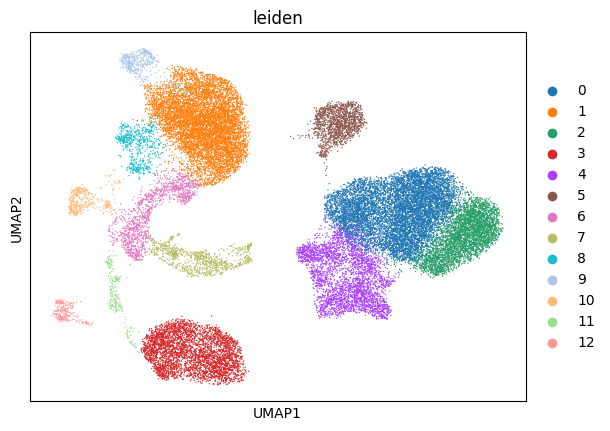

In [37]:
sc.tl.leiden(adata_scvi, resolution=0.5)  
sc.pl.umap(adata_scvi, color="leiden")

In [185]:
adata_celltypist.obs["cell_type"] = results.predicted_labels["majority_voting"]

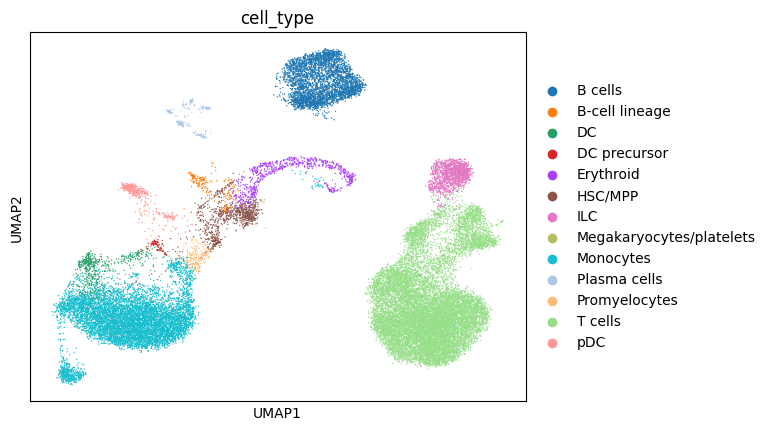

In [187]:
sc.pp.neighbors(adata_celltypist)
sc.tl.umap(adata_celltypist)
sc.pl.umap(adata_celltypist, color="cell_type")

In [191]:
adata_celltypist.obs["cell_type"].value_counts()

cell_type
T cells                     15676
Monocytes                    8298
B cells                      3759
ILC                          1384
HSC/MPP                       865
Erythroid                     760
DC                            562
pDC                           437
Plasma cells                  228
B-cell lineage                224
Promyelocytes                 210
DC precursor                   77
Megakaryocytes/platelets        6
Name: count, dtype: int64

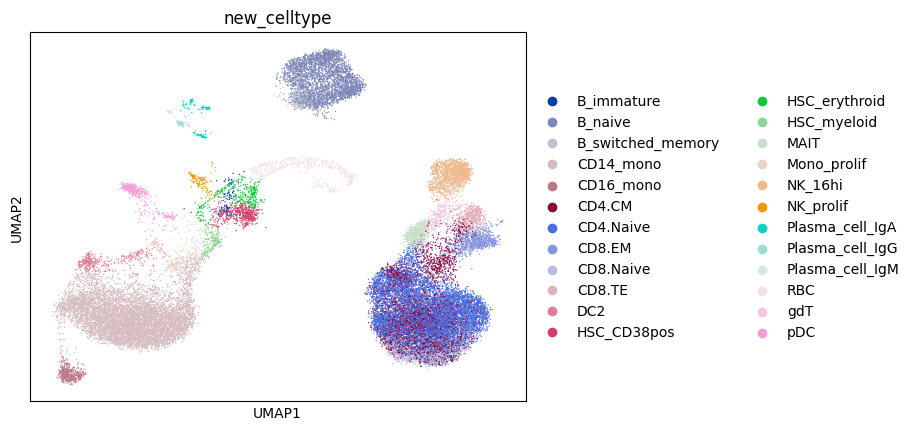

In [197]:
sc.pl.umap(adata_celltypist, color="new_celltype")

In [198]:
adata_celltypist.obs["new_celltype"].value_counts()

new_celltype
CD4.Naive            8394
CD14_mono            7964
CD4.CM               3898
B_naive              3352
NK_16hi              1386
CD8.Naive            1223
CD8.EM                832
RBC                   606
MAIT                  571
HSC_CD38pos           510
CD8.TE                499
pDC                   425
CD16_mono             423
B_switched_memory     407
DC2                   399
HSC_erythroid         332
Mono_prolif           309
gdT                   254
HSC_myeloid           223
NK_prolif             145
Plasma_cell_IgA       126
B_immature            107
Plasma_cell_IgG        68
Plasma_cell_IgM        33
Name: count, dtype: int64